# this is a file for calculating the Lagrangian rate of change of the log-scale $Chl_a$ using  $\frac{D \ ( log_{10} Chl_a)}{Dt}:=\frac{1}{Chl_a}\frac{D \ ( Chl_a)}{Dt}$
* aaa
  * aaa
    * aaa
    * aaa

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import xarray as xr

/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# load the floats data 
# ********************
# *** CSV files ***
# ********************
# load the floats data, take the lon and lat as list out and calculate the distance

# load CSV output    
# some how the CSV Format has some compatibility issues here
# see readme file for the file convetion in the experiments,
# for instance "3" indicates distance is addd to the dataset 
df_chl_out_15D_3 = pd.read_csv('./data_collector_modisa_chla9km/df_chl_out_15D_modisa_3.csv', \
                              index_col='index')
df_chl_out_15D_3

,id,time,lon,vn,spd,var_lon,var_tmp,ve,temp,var_lat,lat,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist
index,,,,,,,,,,,,,,,,
2073,10206,2002-11-01,67.239550,4.393483,7.707300,0.001396,1000.000000,-4.056967,NaN,0.000461,11.003467,0.131253,-0.881891,-0.000230,NaN,532.47000
2077,15707,2002-11-01,67.516567,-13.316117,24.136500,0.000146,1000.000000,-15.863733,NaN,0.000074,13.536150,0.158023,-0.801279,0.002436,-2.613278,552.07500
2095,34710,2002-11-01,63.079750,16.525517,17.614183,0.000127,0.001804,-1.195583,28.666317,0.000066,17.411183,0.392572,-0.406080,-0.167135,NaN,550.51700
2101,34721,2002-11-01,67.881250,6.486583,14.737233,0.000121,0.001813,6.646367,29.393383,0.000063,12.702833,0.152538,-0.816623,0.010258,-1.988946,481.64700
2332,10206,2002-11-16,66.993317,1.400700,4.379483,0.003644,1000.000000,-2.148200,NaN,0.000991,11.224017,0.140250,-0.853096,0.008997,-2.045886,558.22800
2336,15707,2002-11-16,65.486917,-5.950300,21.719050,0.000135,1000.000000,-18.206700,NaN,0.000070,12.378467,0.154963,-0.809773,-0.003061,NaN,730.53000
2354,34710,2002-11-16,62.155933,37.775033,54.870467,0.000127,0.001738,1.705867,27.485500,0.000064,21.077217,0.552854,-0.257389,0.160282,-0.795115,273.45700
2360,34721,2002-11-16,68.290100,10.951950,12.429300,0.000105,0.001749,-1.591367,29.041267,0.000056,13.955783,0.152553,-0.816579,0.000015,-4.818009,494.47500
2591,10206,2002-12-01,66.049467,6.777450,14.383300,0.007490,1000.000000,-12.568283,NaN,0.001855,11.718717,0.141565,-0.849043,0.001315,-2.881075,660.64700


In [3]:
check1 = df_chl_out_15D_3.chl_rate/ df_chl_out_15D_3.chlor_a 
check2 = df_chl_out_15D_3.chl_rate.divide(df_chl_out_15D_3.chlor_a, axis = 'index')
# an check 
np.sum(abs(check1 - check2))

0.0

In [4]:
# add the column to the dataframe and output the dataset
df_chl_out_15D_3['chlor_a_log10_rate'] = pd.Series(np.array(check2), index=df_chl_out_15D_3.index)
df_chl_out_15D_3.head()

,id,time,lon,vn,spd,var_lon,var_tmp,ve,temp,var_lat,lat,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_log10_rate
index,,,,,,,,,,,,,,,,,
2073,10206,2002-11-01,67.239550,4.393483,7.707300,0.001396,1000.000000,-4.056967,NaN,0.000461,11.003467,0.131253,-0.881891,-0.000230,NaN,532.470,-0.001750
2077,15707,2002-11-01,67.516567,-13.316117,24.136500,0.000146,1000.000000,-15.863733,NaN,0.000074,13.536150,0.158023,-0.801279,0.002436,-2.613278,552.075,0.015417
2095,34710,2002-11-01,63.079750,16.525517,17.614183,0.000127,0.001804,-1.195583,28.666317,0.000066,17.411183,0.392572,-0.406080,-0.167135,NaN,550.517,-0.425743
2101,34721,2002-11-01,67.881250,6.486583,14.737233,0.000121,0.001813,6.646367,29.393383,0.000063,12.702833,0.152538,-0.816623,0.010258,-1.988946,481.647,0.067248
2332,10206,2002-11-16,66.993317,1.400700,4.379483,0.003644,1000.000000,-2.148200,NaN,0.000991,11.224017,0.140250,-0.853096,0.008997,-2.045886,558.228,0.064152


In [5]:
df_chl_out_15D_3.chlor_a_log10_rate.describe()  # more scattered on the left hand side

count    500.000000
mean      -0.450135
std        2.846732
min      -48.407725
25%       -0.284043
50%       -0.020179
75%        0.196936
max        0.944446
Name: chlor_a_log10_rate, dtype: float64

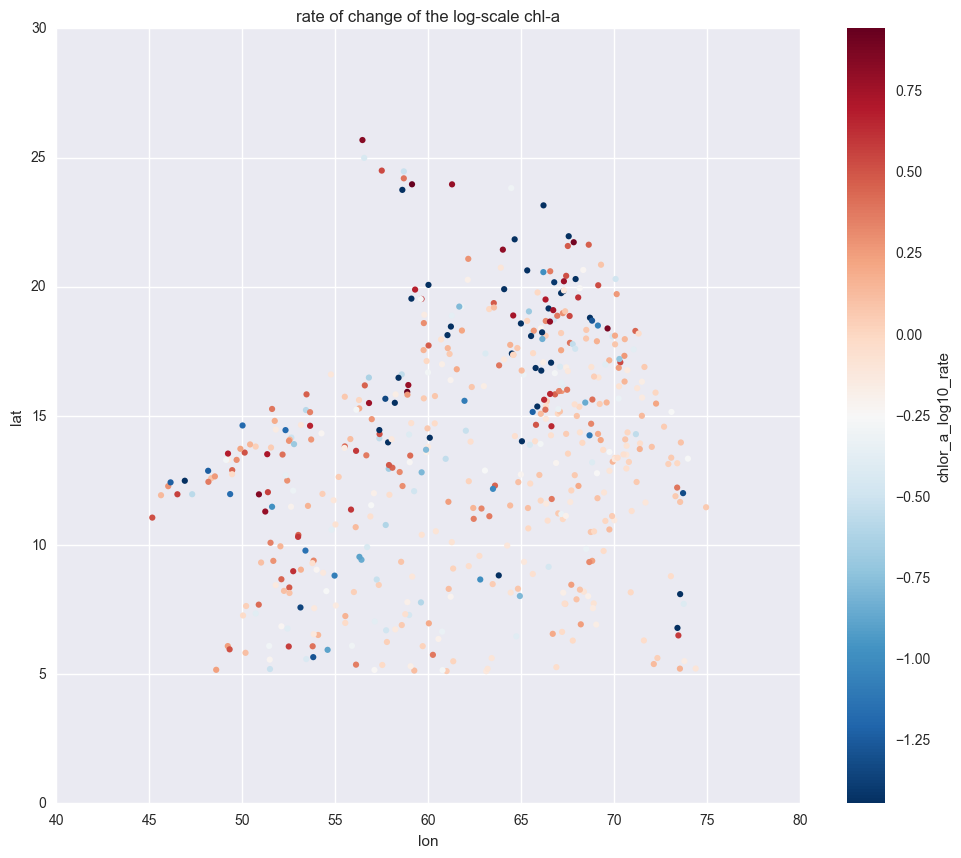

In [6]:
# visualize the ROC of log(chl_a) around the arabian sea region
fig, ax  = plt.subplots(figsize=(12,10))
df_chl_out_15D_3.plot(kind='scatter', x='lon', y='lat', c='chlor_a_log10_rate', cmap='RdBu_r', vmin=check2.median()-0.5*check2.std(), vmax=check2.max(), edgecolor='none', ax=ax, title = 'rate of change of the log-scale chl-a')

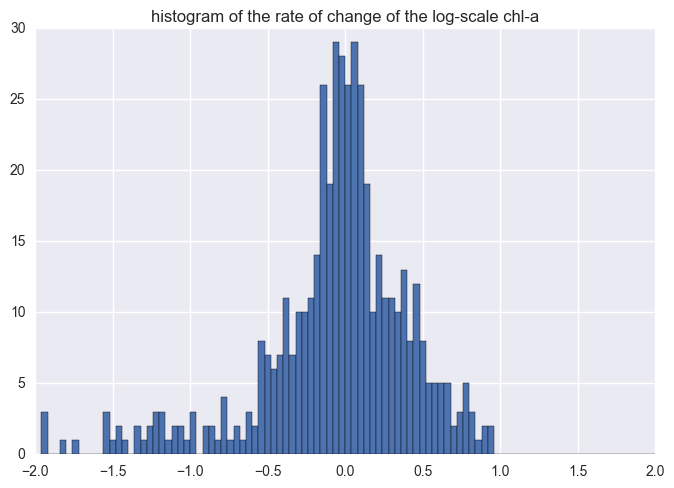

In [7]:
# histogram for non standarized data
axdf_chl = df_chl_out_15D_3.chlor_a_log10_rate.dropna().hist(bins=100,range=[-2,2]) # there are very a few small values on the left
axdf_chl.set_title('histogram of the rate of change of the log-scale chl-a')

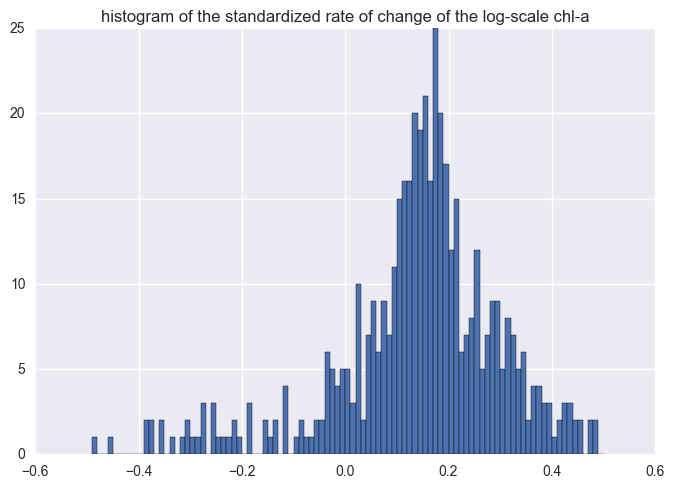

In [8]:
# standarized series
tmp = df_chl_out_15D_3.chlor_a_log10_rate.dropna()
tmp = (tmp - tmp.mean())/tmp.std()
axdf_chl_stdan = tmp.hist(bins=100,range=[-0.5,0.5])   # there are very a few small values on the left
axdf_chl_stdan.set_title('histogram of the standardized rate of change of the log-scale chl-a')

In [9]:
# id:11089, time:2002-11-07"
# (0.194167 - 0.182671) / 0.194167    == 0.059207
df_chl_out_15D_3.sort_values(by=['id', 'time']).head()

,id,time,lon,vn,spd,var_lon,var_tmp,ve,temp,var_lat,lat,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_log10_rate
index,,,,,,,,,,,,,,,,,
2073,10206,2002-11-01,67.239550,4.393483,7.707300,0.001396,1000.0,-4.056967,NaN,0.000461,11.003467,0.131253,-0.881891,-0.000230,NaN,532.470,-0.001750
2332,10206,2002-11-16,66.993317,1.400700,4.379483,0.003644,1000.0,-2.148200,NaN,0.000991,11.224017,0.140250,-0.853096,0.008997,-2.045886,558.228,0.064152
2591,10206,2002-12-01,66.049467,6.777450,14.383300,0.007490,1000.0,-12.568283,NaN,0.001855,11.718717,0.141565,-0.849043,0.001315,-2.881075,660.647,0.009289
2850,10206,2002-12-16,64.844550,3.686400,10.204233,0.002841,1000.0,-8.721100,NaN,0.000811,12.433233,0.159126,-0.798257,0.017561,-1.755447,799.905,0.110360
3109,10206,2002-12-31,63.592417,-4.998550,13.272817,0.001646,1000.0,-11.821550,NaN,0.000543,12.299100,0.287051,-0.542041,0.127924,-0.893047,935.974,0.445650


In [10]:
# CSV CSV CSV CSV with specfic index
# df_chl_out_15D_3.csv --  {lat, lon, temp, chl_rate, dist}
# df_chl_out_15D_3.csv --  {lat, lon, temp, chl_rate, dist, chlor_a_log10_rate}

# 3 represents 3 features: {temp, chl_rate, dist}
# 4 represents 4 features: {temp, chl_rate, dist, chlor_a_log10_rate }
df_chl_out_15D_3.to_csv('df_chl_out_15D_modisa_4.csv', sep=',', index_label = 'index')

# load CSV output
test = pd.read_csv('df_chl_out_15D_modisa_4.csv', index_col='index')

# a check
test.sort_values(by=['id', 'time']).head()

,id,time,lon,vn,spd,var_lon,var_tmp,ve,temp,var_lat,lat,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_log10_rate
index,,,,,,,,,,,,,,,,,
2073,10206,2002-11-01,67.239550,4.393483,7.707300,0.001396,1000.0,-4.056967,NaN,0.000461,11.003467,0.131253,-0.881891,-0.000230,NaN,532.470,-0.001750
2332,10206,2002-11-16,66.993317,1.400700,4.379483,0.003644,1000.0,-2.148200,NaN,0.000991,11.224017,0.140250,-0.853096,0.008997,-2.045886,558.228,0.064152
2591,10206,2002-12-01,66.049467,6.777450,14.383300,0.007490,1000.0,-12.568283,NaN,0.001855,11.718717,0.141565,-0.849043,0.001315,-2.881075,660.647,0.009289
2850,10206,2002-12-16,64.844550,3.686400,10.204233,0.002841,1000.0,-8.721100,NaN,0.000811,12.433233,0.159126,-0.798257,0.017561,-1.755447,799.905,0.110360
3109,10206,2002-12-31,63.592417,-4.998550,13.272817,0.001646,1000.0,-11.821550,NaN,0.000543,12.299100,0.287051,-0.542041,0.127924,-0.893047,935.974,0.445650


In [11]:
print("test")

test
